# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [23]:
import pandas as pd

df = pd.read_csv("data/Lab2/us_contagious_diseases.csv")

df.head()

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [24]:
#measles_data = df[(df['disease'] == 'Measles') & (~df['state'].isin(['Alaska', 'Hawaii']))].copy()
measles_data = df[(df['disease'] == 'Measles') & (df['state'] != 'Alaska') & (df['state'] != "Hawaii")].copy()
measles_data

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
2346,2347,Measles,Alabama,1928,52,8843,2589923.0
2347,2348,Measles,Alabama,1929,49,2959,2619131.0
2348,2349,Measles,Alabama,1930,52,4156,2646248.0
2349,2350,Measles,Alabama,1931,49,8934,2670818.0
2350,2351,Measles,Alabama,1932,41,270,2693027.0
...,...,...,...,...,...,...,...
6166,6167,Measles,Wyoming,1998,0,0,479897.0
6167,6168,Measles,Wyoming,1999,0,0,486758.0
6168,6169,Measles,Wyoming,2000,0,0,493782.0
6169,6170,Measles,Wyoming,2001,0,0,500794.0


In [25]:
measles_data['year_count'] = measles_data['count'] * (52 / measles_data['weeks_reporting'])
measles_data['rate_per_100k'] = (measles_data['year_count'] / measles_data['population']) * 100000

clean_data = measles_data[['state', 'year', 'count', 'population', 'rate_per_100k']]

clean_data

,state,year,count,population,rate_per_100k
2346,Alabama,1928,8843,2589923.0,341.438722
2347,Alabama,1929,2959,2619131.0,119.893326
2348,Alabama,1930,4156,2646248.0,157.052551
2349,Alabama,1931,8934,2670818.0,354.984113
2350,Alabama,1932,270,2693027.0,12.715766
...,...,...,...,...,...
6166,Wyoming,1998,0,479897.0,NaN
6167,Wyoming,1999,0,486758.0,NaN
6168,Wyoming,2000,0,493782.0,NaN
6169,Wyoming,2001,0,500794.0,NaN


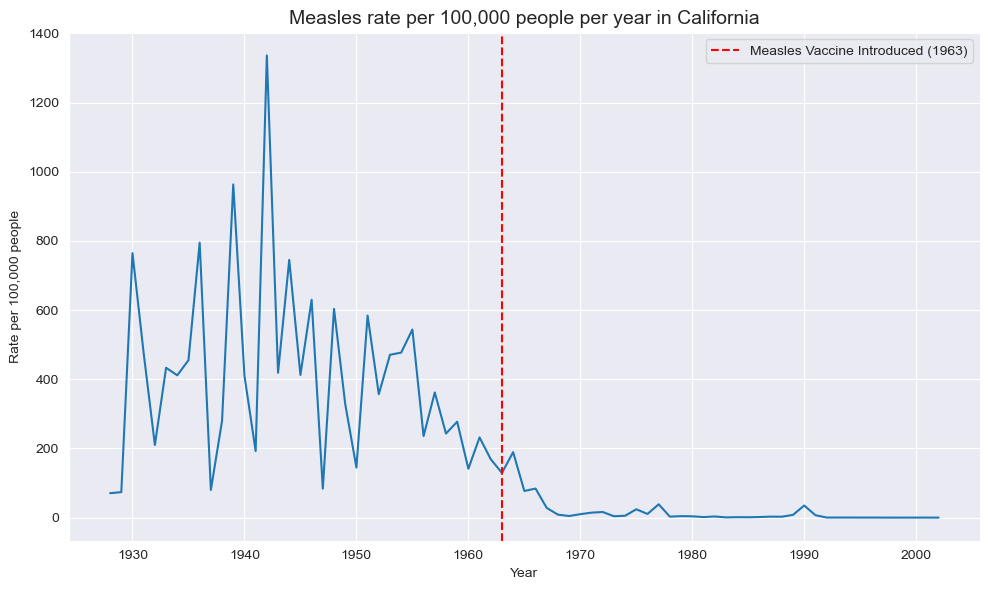

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

california_measles = clean_data[clean_data['state'] == 'California']

plt.figure(figsize=(10, 6))
sns.lineplot(data=california_measles, x='year', y='rate_per_100k')

measles_vaccine = 1963
plt.axvline(x=measles_vaccine, color='red', linestyle='--', label='Measles Vaccine Introduced (1963)')

plt.title('Measles rate per 100,000 people per year in California', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rate per 100,000 people')
plt.legend()

plt.tight_layout()
plt.show()

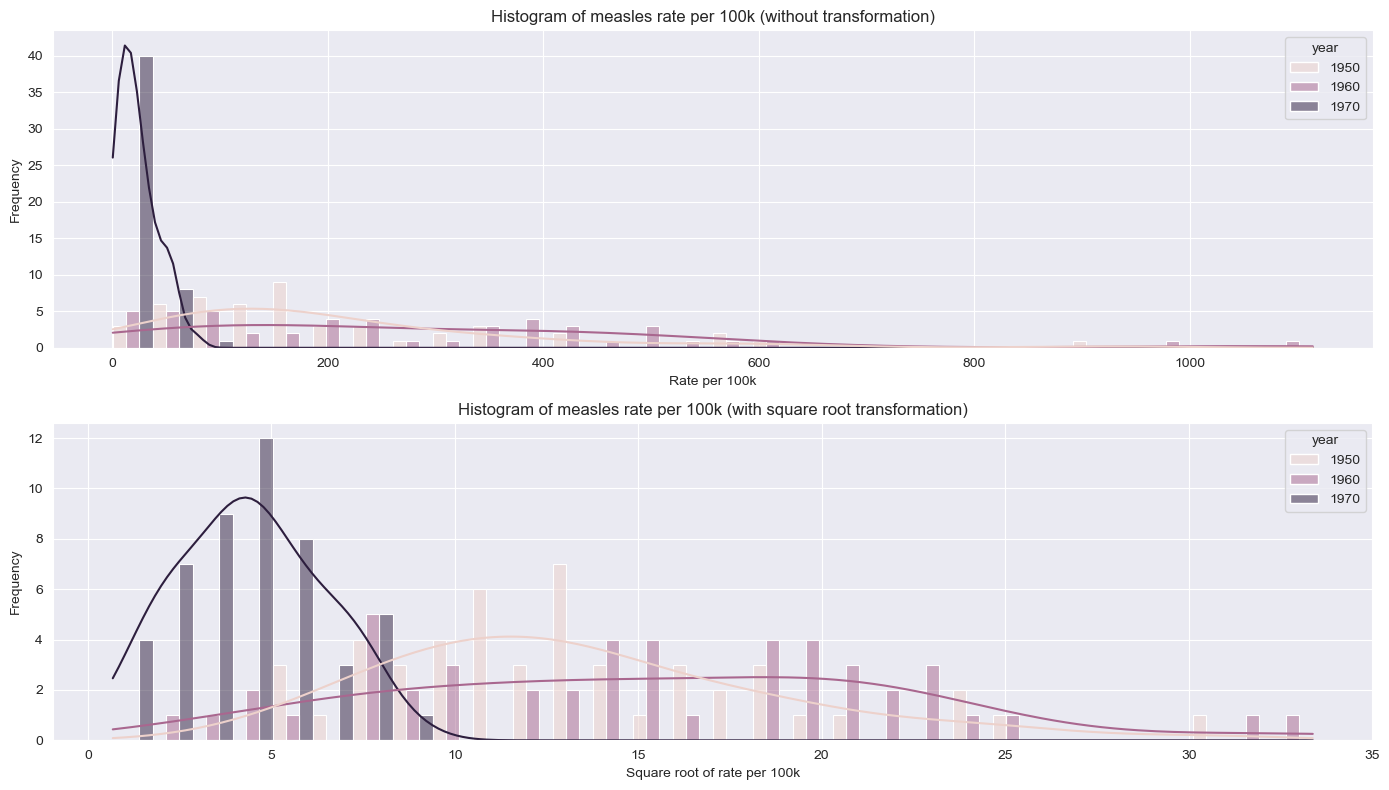

In [27]:
years_of_interest = [1950, 1960, 1970]
measles_years = clean_data[clean_data['year'].isin(years_of_interest)].copy()

plt.figure(figsize=(14, 8))

# without transformation
plt.subplot(2, 1, 1)
sns.histplot(data=measles_years, x='rate_per_100k', hue='year', multiple="dodge", bins=30, kde=True)
plt.title('Histogram of measles rate per 100k (without transformation)')
plt.xlabel('Rate per 100k')
plt.ylabel('Frequency')

# square root transformation 
measles_years['sqrt_rate_per_100k'] = measles_years['rate_per_100k'] ** 0.5

plt.subplot(2, 1, 2)
sns.histplot(data=measles_years, x='sqrt_rate_per_100k', hue='year', multiple="dodge", bins=30, kde=True)
plt.title('Histogram of measles rate per 100k (with square root transformation)')
plt.xlabel('Square root of rate per 100k')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


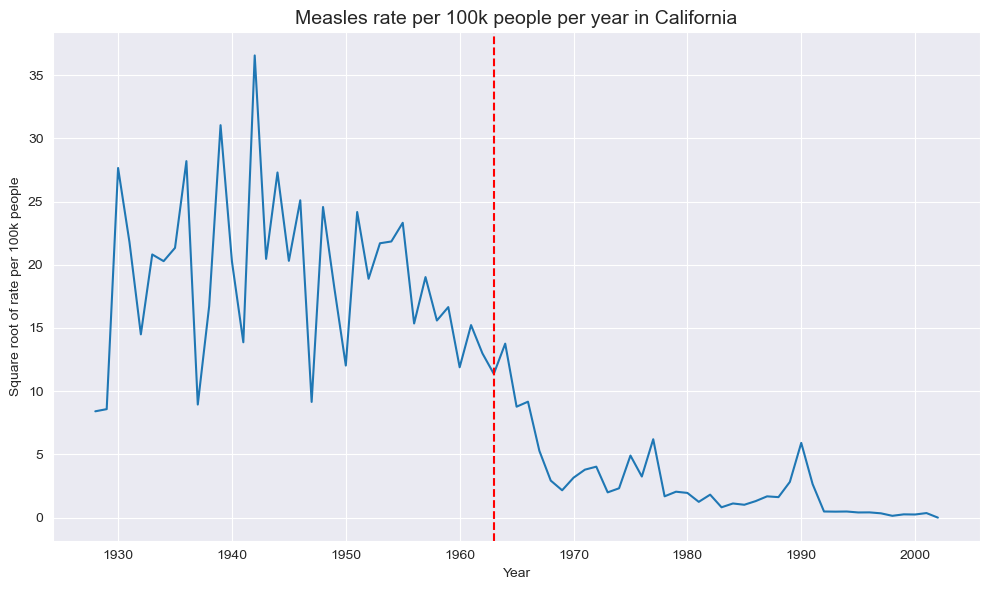

In [28]:
california_measles = clean_data[clean_data['state'] == 'California'].copy()
california_measles['sqrt_rate_per_100k'] = california_measles['rate_per_100k'] ** 0.5

plt.figure(figsize=(10, 6))
sns.lineplot(data=california_measles, x='year', y='sqrt_rate_per_100k')

measles_vaccine = 1963
plt.axvline(x=measles_vaccine, color='red', linestyle='--', label='Measles Vaccine Introduced (1963)')

plt.title('Measles rate per 100k people per year in California', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Square root of rate per 100k people')

plt.tight_layout()
plt.show()


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_85193/2620354039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'sqrt_rate_per_100k'] = clean_data['rate_per_100k'] ** 0.5


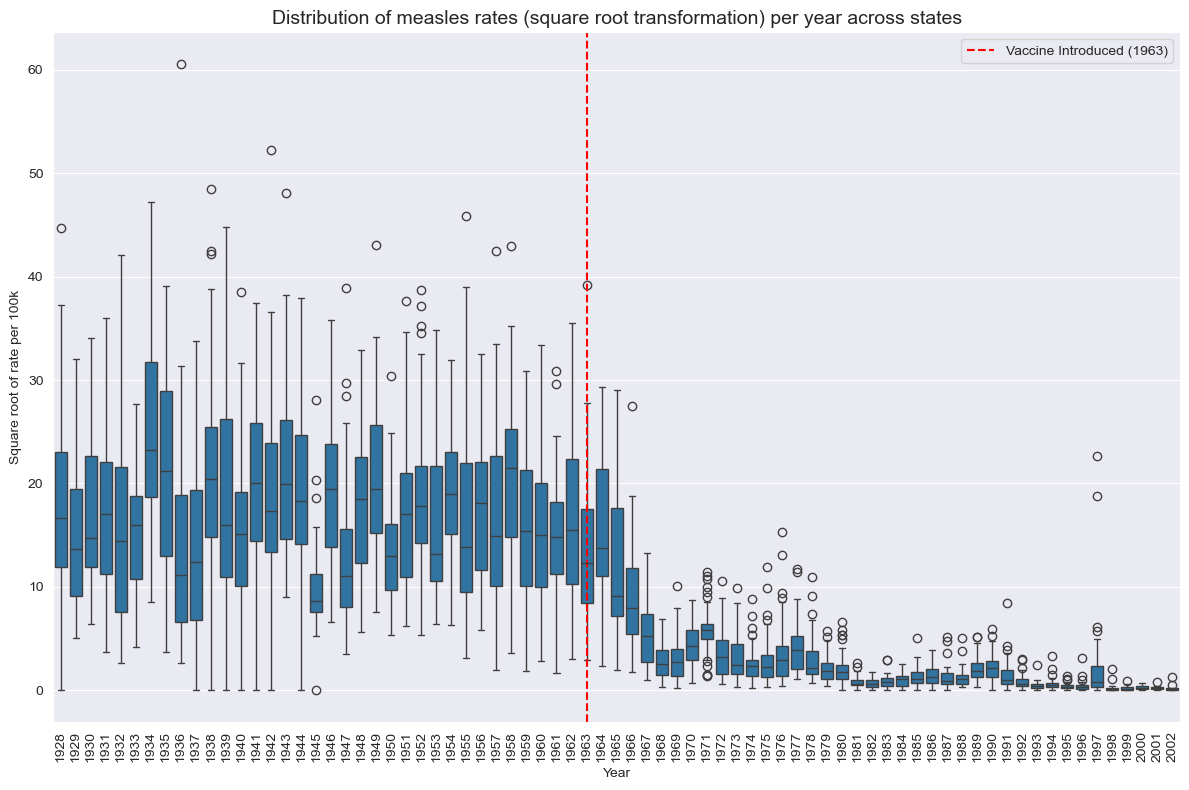

In [29]:
# Square root transformation
clean_data.loc[:, 'sqrt_rate_per_100k'] = clean_data['rate_per_100k'] ** 0.5

plt.figure(figsize=(12, 8))
sns.boxplot(data=clean_data, x='year', y='sqrt_rate_per_100k')

plt.axvline(x=measles_vaccine - clean_data['year'].min(), color='red', linestyle='--', label='Vaccine Introduced (1963)')

plt.title('Distribution of measles rates (square root transformation) per year across states', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Square root of rate per 100k')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
#plt.savefig('measles_rates_distribution.jpg', format='jpg', dpi=300)
plt.show()

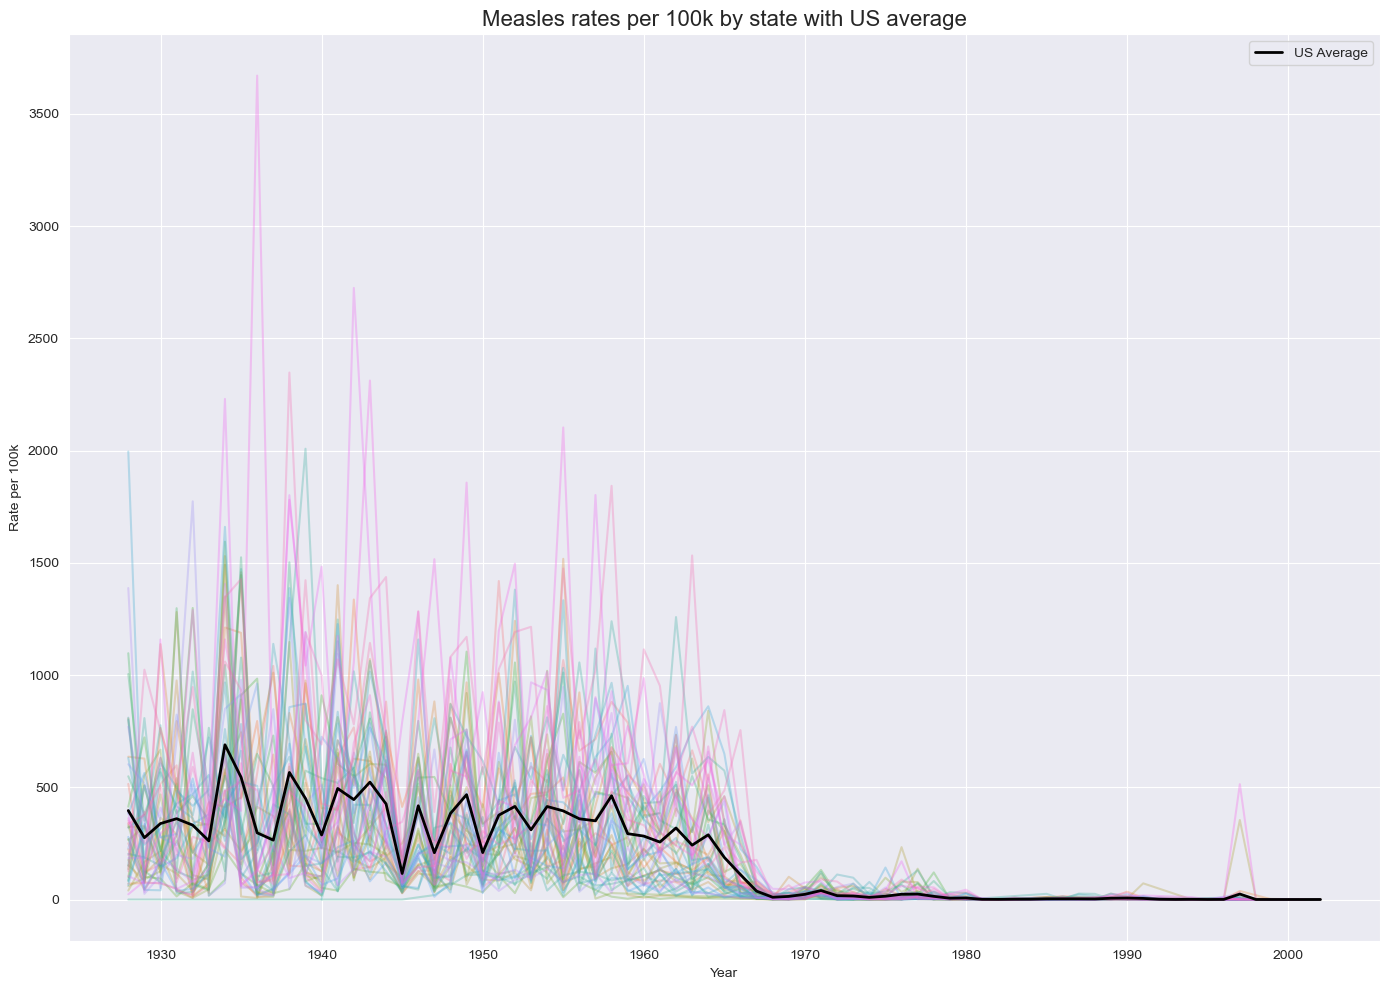

In [30]:
us_average = clean_data.groupby('year')['rate_per_100k'].mean().reset_index()
us_average['state'] = 'US Average' 

# Combine the state data with the US average data
data_with_us_avg = pd.concat([clean_data, us_average], ignore_index=True)

plt.figure(figsize=(14, 10))

sns.lineplot(data=data_with_us_avg, x='year', y='rate_per_100k', hue='state', legend=False, alpha=0.3)

sns.lineplot(data=us_average, x='year', y='rate_per_100k', color='black', linewidth=2, label='US Average')

plt.title('Measles rates per 100k by state with US average', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Rate per 100k')

plt.legend()
plt.tight_layout()
plt.show()

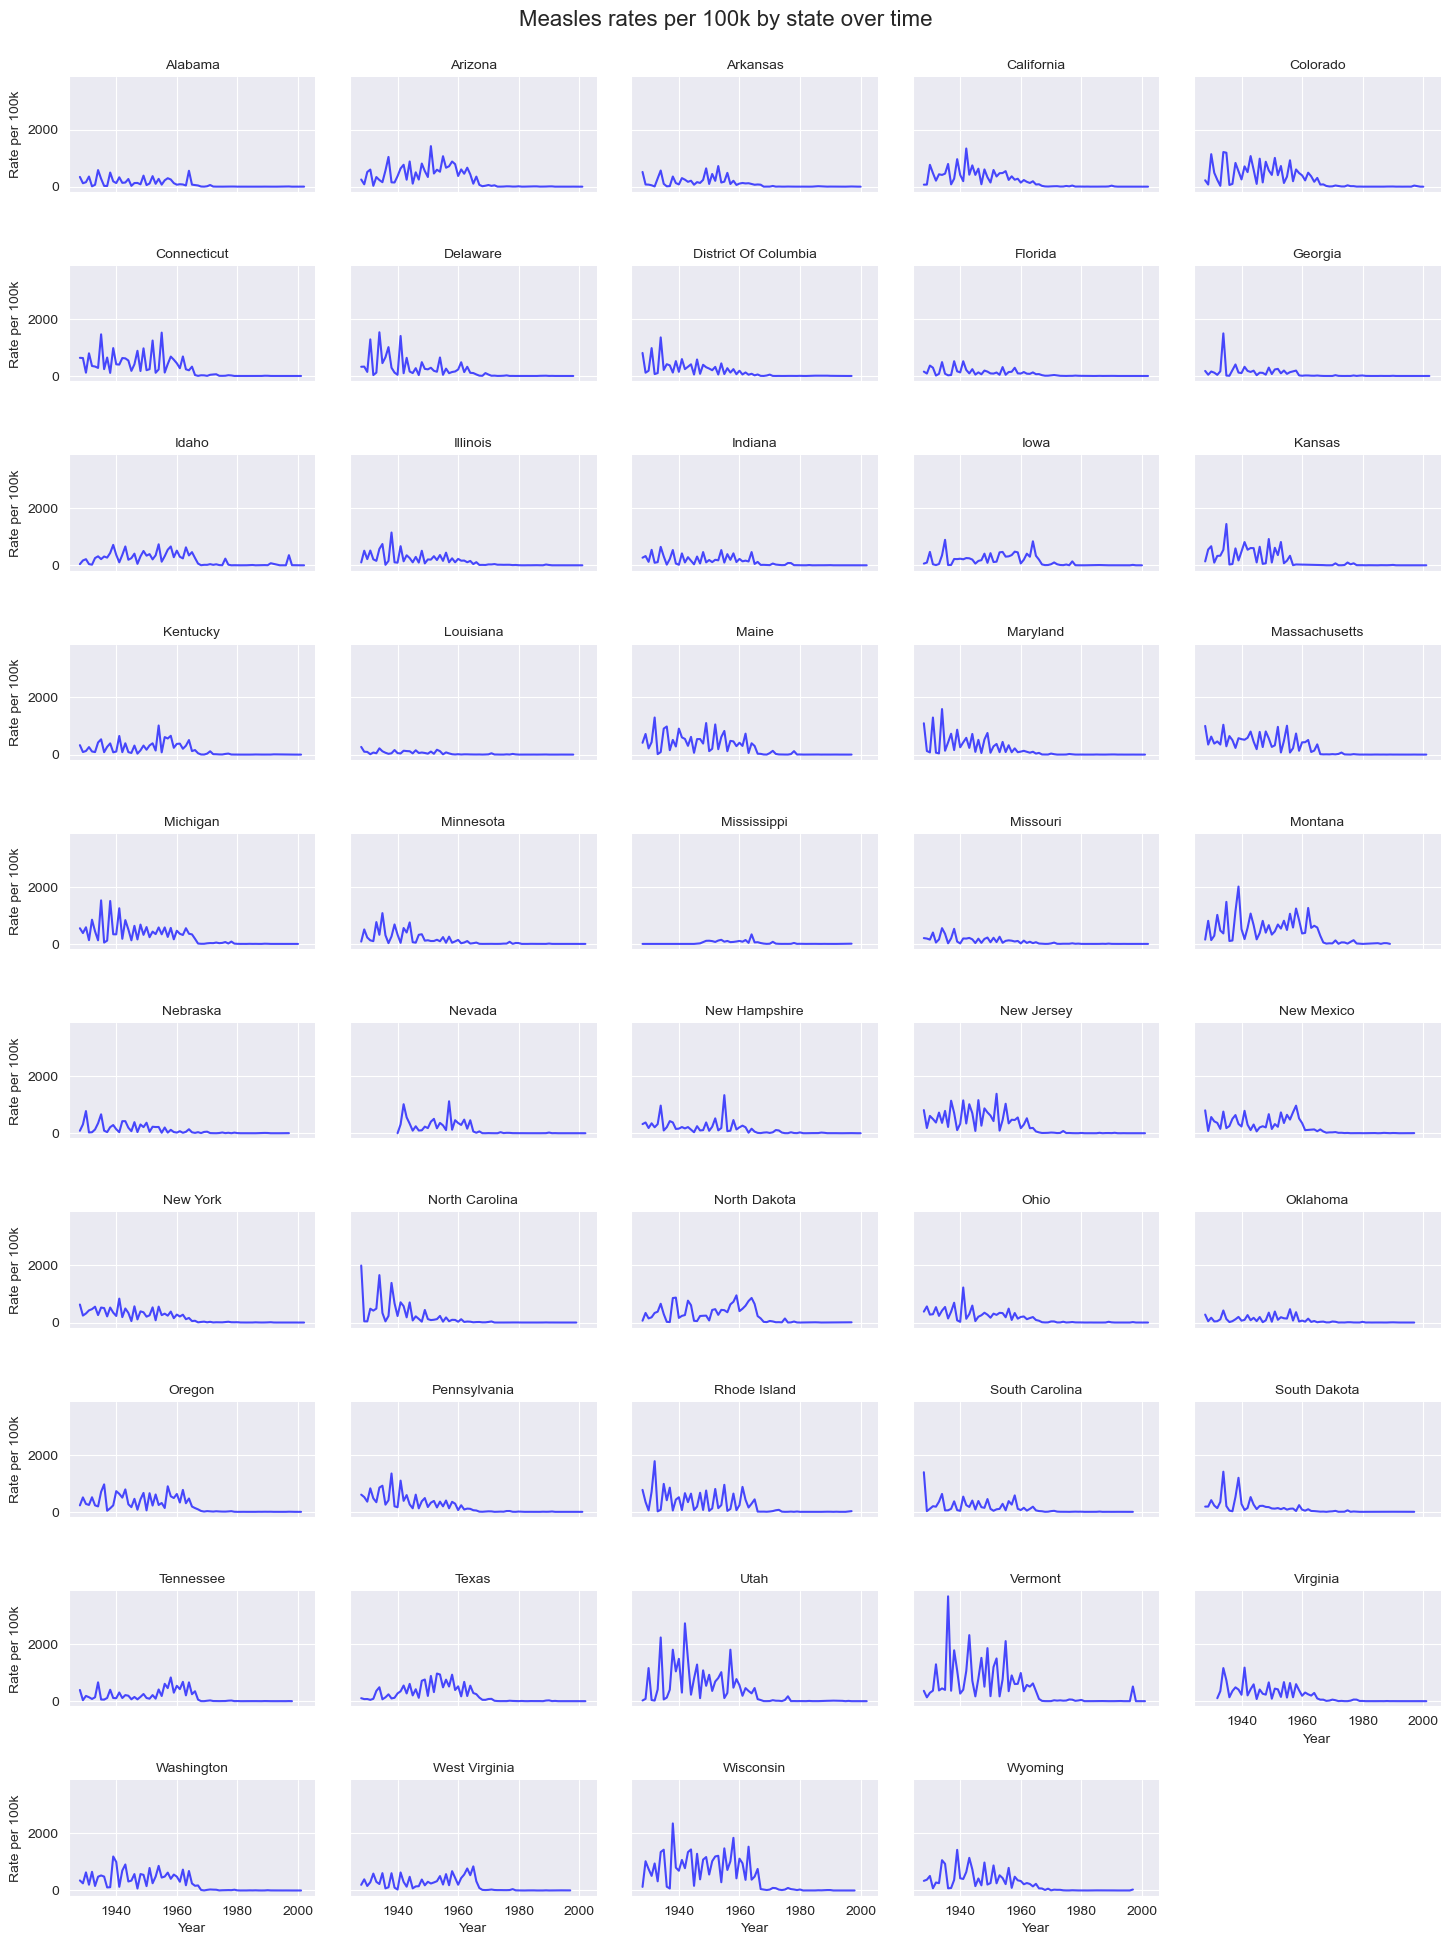

In [31]:
g = sns.FacetGrid(measles_data, col="state", col_wrap=5, height=2, aspect=1.5)
g.map(sns.lineplot, "year", "rate_per_100k", color="blue", alpha=0.7)
g.fig.suptitle("Measles rates per 100k by state over time", fontsize=16)
g.set_axis_labels("Year", "Rate per 100k")
g.set_titles("{col_name}")
g.tight_layout(pad=2.5)
plt.show()

In [32]:
from scipy.stats import ttest_ind
import plotly.express as px

vaccine_years = {"Hepatitis A": 1995, "Polio": 1955, "Measles": 1963}
excluded_states = ["Alaska", "Hawaii"]

#t-test analysis for each disease
def analyze_and_plot_disease(disease, vaccine_year):
    df_disease = df[(df["disease"] == disease) & (~df["state"].isin(excluded_states))].copy()
    
    df_disease["est cases"] = round(df_disease["count"] / df_disease["weeks_reporting"] * 52)
    df_disease = df_disease.groupby("year")[["est cases", "population"]].sum()
    df_disease["est avg per 100k"] = df_disease["est cases"] / (df_disease["population"] / 100000)
    
    pre_vaccine_data = df_disease[df_disease.index < vaccine_year]["est avg per 100k"]
    post_vaccine_data = df_disease[df_disease.index >= vaccine_year]["est avg per 100k"]
    
    # t-test, dropna() for dropping NaN values so only relevant data is considered
    t_stat, p_value = ttest_ind(pre_vaccine_data.dropna(), post_vaccine_data.dropna(), equal_var=False)
    
    print(f"\n{disease} Vaccine Effectiveness Test:")
    print(f"Pre-vaccine mean rate per 100k: {pre_vaccine_data.mean():.2f}")
    print(f"Post-vaccine mean rate per 100k: {post_vaccine_data.mean():.2f}")
    print(f"T-test statistic: {t_stat:.2f}, p-value: {p_value:.5f}")
    
    if p_value < 0.05:
        print("Significant reduction in disease rate post-vaccine.")
    else:
        print("No significant reduction detected.")
        
    fig = px.line(df_disease, y="est avg per 100k", title=f"{disease} rate per 100k over the years")
    fig.add_vline(x=vaccine_year, line_color="red", annotation_text="Vaccine introduced", annotation_position="top right")
    fig.update_layout(xaxis_title="Year", yaxis_title="Rate per 100k")
    fig.show()
    
for disease, year in vaccine_years.items():
    analyze_and_plot_disease(disease, year)


ModuleNotFoundError: No module named 'scipy'